# Identifying Images Of Hot Dogs

### Define Training Parameters

In [1]:
epochs     = 10
batch_size = 10
IMG_HEIGHT = 160
IMG_WIDTH  = 160

### Import packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load The Data

In [3]:
train_directory = './hot_dog_not_hot_dog/train/'
validation_directory  = './hot_dog_not_hot_dog/validation/'

train_positive_dir = train_directory + 'hot_dog'
train_negative_dir = train_directory + 'not_hot_dog'

validation_positive_dir = validation_directory + 'hot_dog'
validation_negative_dir = validation_directory + 'not_hot_dog'

### Count Images In Dataset

In [4]:
num_positives_in_train = len(os.listdir(train_positive_dir))
num_negatives_in_train = len(os.listdir(train_negative_dir))

num_positives_in_validation = len(os.listdir(validation_positive_dir))
num_negatives_in_validation = len(os.listdir(validation_negative_dir))

total_train = num_positives_in_train + num_negatives_in_train
total_validation  = num_positives_in_validation + num_negatives_in_validation

print("Number of Training Images: ", total_train)
print("Number of Test Images: ", total_validation)

Number of Training Images:  798
Number of Test Images:  200


### Data preparation

In [5]:
train_image_generator = ImageDataGenerator(rescale = 1. / 255)
validation_image_generator = ImageDataGenerator(rescale = 1. / 255)

def get_params(directory):
    return {
        'batch_size': batch_size, 
        'directory': directory, 
        'shuffle': True, 
        'target_size': (IMG_HEIGHT, IMG_WIDTH), 
        'class_mode': 'binary'
    }

train_data_gen = train_image_generator.flow_from_directory(**get_params(train_directory))
validation_data_gen  = validation_image_generator.flow_from_directory(**get_params(validation_directory))

Found 798 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Display Training Images

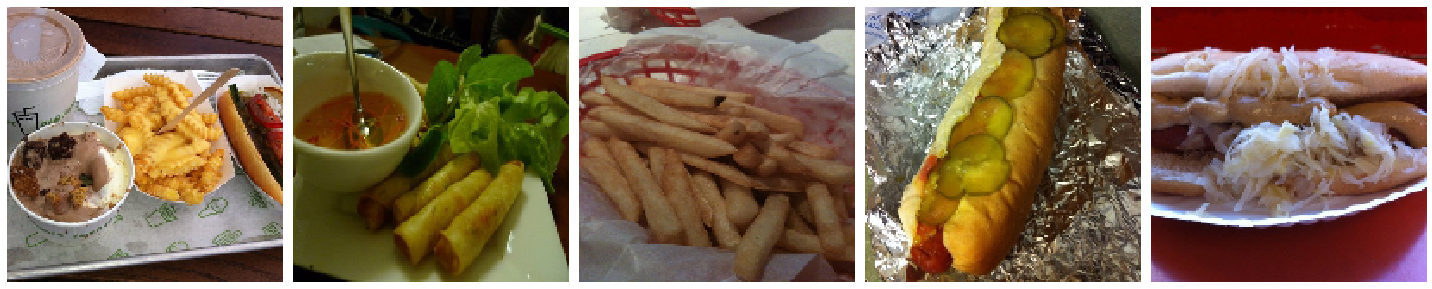

In [6]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_images([train_data_gen[i][0][0] for i in range(5)])

### Model Creation

In [7]:
pretrained_params = {
    'input_shape': (IMG_WIDTH, IMG_HEIGHT, 3),
    'include_top': False,
    'weights': 'imagenet'
}
Pretrained_CNN_model = tf.keras.applications.MobileNetV2(**pretrained_params)
Pretrained_CNN_model.trainable = False

model = Sequential([
    Pretrained_CNN_model,
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_params = {
    'optimizer': 'adam',
    'loss': 'binary_crossentropy',
    'metrics': ['accuracy']
}
model.compile(**model_params)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 32001     
Total params: 2,289,985
Trainable params: 32,001
Non-trainable params: 2,257,984
_________________________________________________________________


### Train the model

In [8]:
fit_params = {
    'epochs': epochs,
    'steps_per_epoch': total_train // batch_size,
    'validation_data': validation_data_gen,
    'validation_steps': total_validation // batch_size,
    'verbose': 1
}

train_log = model.fit(train_data_gen, **fit_params)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 79 steps, validate for 20 steps
Epoch 1/10
79/79 [==============================] - 31s 399ms/step - loss: 0.7528 - accuracy: 0.7703 - val_loss: 0.5393 - val_accuracy: 0.8300
Epoch 2/10
79/79 [==============================] - 30s 376ms/step - loss: 0.1054 - accuracy: 0.9645 - val_loss: 0.5222 - val_accuracy: 0.8750
Epoch 3/10
79/79 [==============================] - 27s 341ms/step - loss: 0.0152 - accuracy: 0.9962 - val_loss: 0.5127 - val_accuracy: 0.8900
Epoch 4/10
79/79 [==============================] - 28s 353ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5690 - val_accuracy: 0.8700
Epoch 5/10
79/79 [==============================] - 28s 352ms/step - loss: 5.7437e-04 - accuracy: 1.0000 - val_loss: 0.5398 - val_accuracy: 0.8850
Epoch 6/10
79/79 [==============================] - 27s 342ms/step - loss: 3.5938e-04 - accuracy: 1.0000 - val_loss: 0.5362 - val_accuracy: 0.8750
Epoch 7/10
79/79 [========================

### Visualize training results

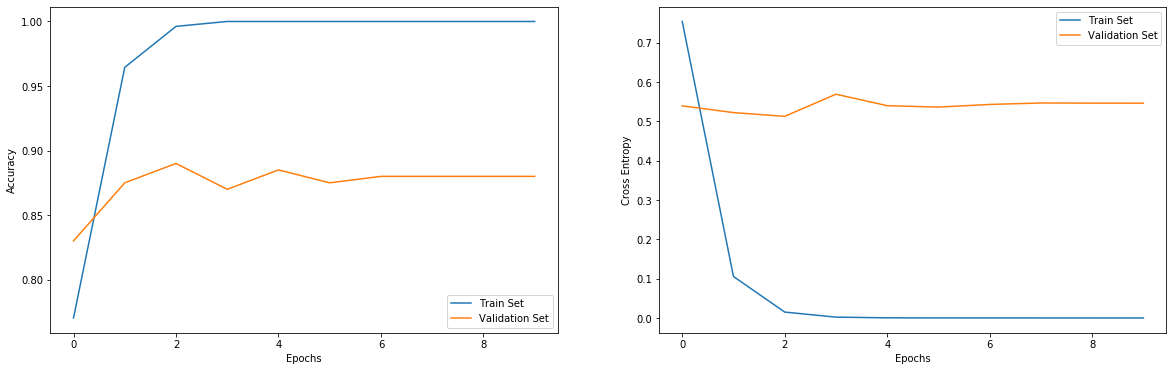

In [10]:
fig = plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.plot([i for i in range(epochs)], train_log.history['accuracy'], label = 'Train Set')
plt.plot([i for i in range(epochs)], train_log.history['val_accuracy'], label = 'Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i for i in range(epochs)], train_log.history['loss'], label = 'Train Set')
plt.plot([i for i in range(epochs)], train_log.history['val_loss'], label = 'Validation Set')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.legend()

plt.show()